# Module 1: Data Science Fundamentals

## Module 1: Data Science Fundamentals
### Sprint 1: Data Wrangling and Storytelling
### Volcano Eruptions, once more!

<div><img src="https://live.staticflickr.com/5626/22168833761_a36d88de4b_b.jpg" width=500 /></div>

## Background

For the last day of this sprint, we're analyzing volcano eruptions once more. Equipped with solid EDA knowledge, your objective is to look at the dataset with a creative spirit. We suggest tackling the task with the following framework:

1. Start by exploring the data, without any initial clear objective.
2. Raise hypotheses, answer them using the data.

---------

## How to start?

So far, your objective has been to answer provided questions using the tools learned. Now, you have to ask questions yourself, and answer them using the data and EDA methods we've studied. How should I know what to ask? I've never seen this data (Okay, not exactly true, we've had a tiny exercise with it, but still).

As a reminder, start from EDA. Be creative! Examine each data source individually. Calculate some basic statistics, visualize the time data in relation to some numerical variable. Don't be afraid to group things and display them. Join data if you sense that enriching one datasource could give insights.

Having done these steps, you should be able to formulate a basic set of questions and start zooming in on the dataset - dissecting it further, along different, more specific dimensions, e.g. "Right, it's clear that rock A is the one errupted most. But maybe that's the case only for some specific set of big volcanoes?". And, down the rabbit hole you go!

## Concepts to explore

You should explore calculating basic data statistical parameters, performing EDA.

## Requirements

* Describe the data with basic statistical parameters - mean, median, quantiles, etc.
* Grouping the data and analyzing the groups - using pandas aggregate methods.
* Work with features - handle missing data, use pandas date APIs.
* Manipulate datasets - use joins.
* Visualize the data - use line, scatter, histogram plots, density plots, regplots, etc.

The data is available [here](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-05-12), you can use any of the datasets from the repository.

## Evaluation Criteria

- The code quality
- The quality of your raised hypotheses
- The quality of how methodologically you verified you hypotheses
- Adherence to the requirements

## Bonus challenges

* Can you enrich the data from sources other than the repository specified?
* Build a model to predict `major_rock_1` given `primary_volcano_type`.

# Volcanos project

##Importing datasets

In [ ]:
# Importing needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pylab
sns.set_color_codes("muted")
sns.set()

In [ ]:
# Reading DataSets
df_volcano = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/volcano.csv')
df_eruptions = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv')
df_events = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/events.csv')

In [ ]:
# DataFrames Shapes
print("Df Volcano shape: ", df_volcano.shape)
print("Df Eruptions shape: ", df_eruptions.shape)
print("Df Events shape: ", df_events.shape)

Df Volcano shape:  (958, 26)
Df Eruptions shape:  (11178, 15)
Df Events shape:  (41322, 10)


In [ ]:
# Volcano DataFrame Head
df_volcano.head(10)

,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,tectonic_settings,evidence_category,major_rock_1,major_rock_2,major_rock_3,major_rock_4,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
0,283001,Abu,Shield(s),-6850,Japan,"Japan, Taiwan, Marianas",Honshu,34.500,131.600,641,Subduction zone / Continental crust (>25 km),Eruption Dated,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,Dacite,,,,,,,,3597,9594,117805,4071152
1,355096,Acamarachi,Stratovolcano,Unknown,Chile,South America,"Northern Chile, Bolivia and Argentina",-23.292,-67.618,6023,Subduction zone / Continental crust (>25 km),Evidence Credible,Dacite,Andesite / Basaltic Andesite,,,,,,,,,0,7,294,9092
2,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,Subduction zone / Continental crust (>25 km),Eruption Observed,Andesite / Basaltic Andesite,Dacite,,,,Basalt / Picro-Basalt,,,,,4329,60730,1042836,7634778
3,213004,Acigol-Nevsehir,Caldera,-2080,Turkey,Mediterranean and Western Asia,Turkey,38.537,34.621,1683,Intraplate / Continental crust (>25 km),Eruption Dated,Rhyolite,Dacite,Basalt / Picro-Basalt,Andesite / Basaltic Andesite,,,,,,,127863,127863,218469,2253483
4,321040,Adams,Stratovolcano,950,United States,Canada and Western USA,USA (Washington),46.206,-121.490,3742,Subduction zone / Continental crust (>25 km),Eruption Dated,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,,,,Dacite,,,,,0,70,4019,393303
5,283170,Adatarayama,Stratovolcano(es),1996,Japan,"Japan, Taiwan, Marianas",Honshu,37.647,140.281,1728,Subduction zone / Continental crust (>25 km),Eruption Observed,Andesite / Basaltic Andesite,,,,,Dacite,Basalt / Picro-Basalt,,,,428,3936,717078,5024654
6,221170,Adwa,Stratovolcano,Unknown,Ethiopia,Africa and Red Sea,Africa (northeastern) and Red Sea,10.070,40.840,1733,Rift zone / Intermediate crust (15-25 km),Evidence Credible,Rhyolite,Basalt / Picro-Basalt,Trachyte / Trachydacite,,,,,,,,101,485,18645,1242922
7,221110,Afdera,Stratovolcano,Unknown,Ethiopia,Africa and Red Sea,Africa (northeastern) and Red Sea,13.088,40.853,1250,Rift zone / Intermediate crust (15-25 km),Evidence Uncertain,Rhyolite,,,,,Basalt / Picro-Basalt,Trachybasalt / Tephrite Basanite,Andesite / Basaltic Andesite,,,51,6042,8611,161009
8,284160,Agrigan,Stratovolcano,1917,United States,"Japan, Taiwan, Marianas","Izu, Volcano, and Mariana Islands",18.770,145.670,965,Subduction zone / Crustal thickness unknown,Eruption Observed,Basalt / Picro-Basalt,Andesite / Basaltic Andesite,,,,,,,,,0,0,0,0
9,342100,Agua,Stratovolcano,Unknown,Guatemala,México and Central America,Guatemala,14.465,-90.743,3760,Subduction zone / Continental crust (>25 km),Evidence Credible,Andesite / Basaltic Andesite,,,,,Dacite,,,,,9890,114404,2530449,7441660


In [ ]:
# Eruptions DataFrame Head
df_eruptions.head(10)

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737
1,343100,San Miguel,22355,Confirmed Eruption,NaN,NaN,2020.0,2.0,22.0,Historical Observations,2020.0,2.0,22.0,13.434,-88.269
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,2020.0,2.0,10.0,Historical Observations,2020.0,4.0,6.0,-21.244,55.708
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,2020.0,1.0,31.0,Historical Observations,2020.0,4.0,17.0,10.830,-85.324
4,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,Historical Observations,2020.0,1.0,12.0,-0.370,-91.550
5,273070,Taal,22344,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,Historical Observations,2020.0,1.0,22.0,14.002,120.993
6,282050,Kuchinoerabujima,22345,Confirmed Eruption,NaN,NaN,2020.0,1.0,11.0,Historical Observations,2020.0,4.0,17.0,30.443,130.217
7,241040,Whakaari/White Island,22338,Confirmed Eruption,1978/90 Crater Complex,2.0,2019.0,12.0,9.0,Historical Observations,2019.0,12.0,9.0,-37.520,177.180
8,311060,Semisopochnoi,22341,Confirmed Eruption,NaN,NaN,2019.0,12.0,7.0,Historical Observations,2020.0,3.0,15.0,51.930,179.580
9,284096,Nishinoshima,22340,Confirmed Eruption,NaN,1.0,2019.0,12.0,5.0,Historical Observations,2020.0,4.0,17.0,27.247,140.874


In [ ]:
# Events DataFrame Head
df_events.head(10)

,volcano_number,volcano_name,eruption_number,eruption_start_year,event_number,event_type,event_remarks,event_date_year,event_date_month,event_date_day
0,210020,Chaine des Puys,10011,-4040,100001,Explosion,NaN,NaN,NaN,NaN
1,210020,Chaine des Puys,10011,-4040,100002,Scoria,NaN,NaN,NaN,NaN
2,210020,Chaine des Puys,10011,-4040,100003,Pyroclastic flow,NaN,NaN,NaN,NaN
3,210020,Chaine des Puys,10011,-4040,100004,Lava flow(s),NaN,NaN,NaN,NaN
4,210020,Chaine des Puys,10011,-4040,100005,Cinder cone formation,NaN,NaN,NaN,NaN
5,210020,Chaine des Puys,10011,-4040,100006,Pumice,NaN,NaN,NaN,NaN
6,210040,Calatrava Volcanic Field,10012,-3600,100008,Explosion,NaN,NaN,NaN,NaN
7,210040,Calatrava Volcanic Field,10012,-3600,100009,Pyroclastic flow,NaN,NaN,NaN,NaN
8,211003,Vulsini,10014,-104,100019,Flames,NaN,NaN,NaN,NaN
9,211004,Colli Albani,10015,-600,100021,Phreatic activity,Uncertain,NaN,NaN,NaN


In [ ]:
# Information about Volcano DataFrame
df_volcano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   volcano_number            958 non-null    int64  
 1   volcano_name              958 non-null    object 
 2   primary_volcano_type      958 non-null    object 
 3   last_eruption_year        958 non-null    object 
 4   country                   958 non-null    object 
 5   region                    958 non-null    object 
 6   subregion                 958 non-null    object 
 7   latitude                  958 non-null    float64
 8   longitude                 958 non-null    float64
 9   elevation                 958 non-null    int64  
 10  tectonic_settings         958 non-null    object 
 11  evidence_category         958 non-null    object 
 12  major_rock_1              958 non-null    object 
 13  major_rock_2              958 non-null    object 
 14  major_rock

In [ ]:
# Checking for null values in columns
df_volcano.isna().any()

volcano_number              False
volcano_name                False
primary_volcano_type        False
last_eruption_year          False
country                     False
region                      False
subregion                   False
latitude                    False
longitude                   False
elevation                   False
tectonic_settings           False
evidence_category           False
major_rock_1                False
major_rock_2                False
major_rock_3                False
major_rock_4                False
major_rock_5                False
minor_rock_1                False
minor_rock_2                False
minor_rock_3                False
minor_rock_4                False
minor_rock_5                False
population_within_5_km      False
population_within_10_km     False
population_within_30_km     False
population_within_100_km    False
dtype: bool

There are no Null values in Volcano dataset, though there are missing values stored as empty strings in rock columns.

In [ ]:
df_volcano = df_volcano.replace('\xa0', np.nan)

In [ ]:
# Checking for null values in columns
df_volcano.isna().any()

volcano_number              False
volcano_name                False
primary_volcano_type        False
last_eruption_year          False
country                     False
region                      False
subregion                   False
latitude                    False
longitude                   False
elevation                   False
tectonic_settings           False
evidence_category           False
major_rock_1                False
major_rock_2                 True
major_rock_3                 True
major_rock_4                 True
major_rock_5                 True
minor_rock_1                 True
minor_rock_2                 True
minor_rock_3                 True
minor_rock_4                 True
minor_rock_5                 True
population_within_5_km      False
population_within_10_km     False
population_within_30_km     False
population_within_100_km    False
dtype: bool

Another cleaning that should be done is Primary volcano type strings, as single and plural types stored as two different types.

In [ ]:
# Primary volcano type strings should be cleaned, as single and plural types stored as two different types. 
df_volcano['primary_volcano_type'] = df_volcano['primary_volcano_type'].str.replace('(es)', '')
df_volcano['primary_volcano_type'] = df_volcano['primary_volcano_type'].str.replace('(s)', '')
df_volcano['primary_volcano_type'] = df_volcano['primary_volcano_type'].str.replace('(', '')
df_volcano['primary_volcano_type'] = df_volcano['primary_volcano_type'].str.replace(')', '')
df_volcano['primary_volcano_type'] = df_volcano['primary_volcano_type'].str.replace('?', '')
df_volcano


,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,tectonic_settings,evidence_category,major_rock_1,major_rock_2,major_rock_3,major_rock_4,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
0,283001,Abu,Shield,-6850,Japan,"Japan, Taiwan, Marianas",Honshu,34.500,131.600,641,Subduction zone / Continental crust (>25 km),Eruption Dated,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,Dacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3597,9594,117805,4071152
1,355096,Acamarachi,Stratovolcano,Unknown,Chile,South America,"Northern Chile, Bolivia and Argentina",-23.292,-67.618,6023,Subduction zone / Continental crust (>25 km),Evidence Credible,Dacite,Andesite / Basaltic Andesite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7,294,9092
2,342080,Acatenango,Stratovolcano,1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,Subduction zone / Continental crust (>25 km),Eruption Observed,Andesite / Basaltic Andesite,Dacite,NaN,NaN,NaN,Basalt / Picro-Basalt,NaN,NaN,NaN,NaN,4329,60730,1042836,7634778
3,213004,Acigol-Nevsehir,Caldera,-2080,Turkey,Mediterranean and Western Asia,Turkey,38.537,34.621,1683,Intraplate / Continental crust (>25 km),Eruption Dated,Rhyolite,Dacite,Basalt / Picro-Basalt,Andesite / Basaltic Andesite,NaN,NaN,NaN,NaN,NaN,NaN,127863,127863,218469,2253483
4,321040,Adams,Stratovolcano,950,United States,Canada and Western USA,USA (Washington),46.206,-121.490,3742,Subduction zone / Continental crust (>25 km),Eruption Dated,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,NaN,NaN,NaN,Dacite,NaN,NaN,NaN,NaN,0,70,4019,393303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,300242,Zimina,Stratovolcano,Unknown,Russia,Kamchatka and Mainland Asia,Kamchatka Peninsula,55.862,160.603,3057,Subduction zone / Continental crust (>25 km),Evidence Credible,Andesite / Basaltic Andesite,Dacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,77,11184
954,341061,Zitacuaro-Valle de Bravo,Caldera,-3050,Mexico,México and Central America,Mexico,19.400,-100.250,3500,Subduction zone / Continental crust (>25 km),Eruption Dated,Dacite,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,NaN,NaN,Trachyandesite / Basaltic Trachyandesite,Trachybasalt / Tephrite Basanite,NaN,NaN,NaN,231977,231977,490440,4838069
955,221020,Zubair Group,Shield,2013,Yemen,Africa and Red Sea,Africa (northeastern) and Red Sea,15.050,42.180,191,Rift zone / Oceanic crust (< 15 km),Eruption Observed,Basalt / Picro-Basalt,Trachybasalt / Tephrite Basanite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,7,671171
956,221021,Zukur,Shield,Unknown,Yemen,Africa and Red Sea,Africa (northeastern) and Red Sea,14.020,42.750,624,Rift zone / Oceanic crust (< 15 km),Evidence Credible,Basalt / Picro-Basalt,Trachybasalt / Tephrite Basanite,Trachyandesite / Basaltic Trachyandesite,Trachyte / Trachydacite,NaN,NaN,NaN,NaN,NaN,NaN,508,922,1075,1472800


In [ ]:
# Information about Volcano DataFrame
df_eruptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11178 entries, 0 to 11177
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   volcano_number          11178 non-null  int64  
 1   volcano_name            11178 non-null  object 
 2   eruption_number         11178 non-null  int64  
 3   eruption_category       11178 non-null  object 
 4   area_of_activity        4694 non-null   object 
 5   vei                     8272 non-null   float64
 6   start_year              11177 non-null  float64
 7   start_month             10985 non-null  float64
 8   start_day               10982 non-null  float64
 9   evidence_method_dating  9898 non-null   object 
 10  end_year                4332 non-null   float64
 11  end_month               4329 non-null   float64
 12  end_day                 4326 non-null   float64
 13  latitude                11178 non-null  float64
 14  longitude               11178 non-null

In [ ]:
# Checking for null values in columns
df_eruptions.isna().any()

volcano_number            False
volcano_name              False
eruption_number           False
eruption_category         False
area_of_activity           True
vei                        True
start_year                 True
start_month                True
start_day                  True
evidence_method_dating     True
end_year                   True
end_month                  True
end_day                    True
latitude                  False
longitude                 False
dtype: bool

There are Null values in columns area_of_activity, vei, start_year, start_month, start_day, evidence_method_dating, end_year, end_month, end_day. Even more than half of data are missing, so if using these columns in analysis - filer na's.

In [ ]:
# Information about Events DataFrame
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41322 entries, 0 to 41321
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   volcano_number       41322 non-null  int64  
 1   volcano_name         41322 non-null  object 
 2   eruption_number      41322 non-null  int64  
 3   eruption_start_year  41322 non-null  int64  
 4   event_number         41322 non-null  int64  
 5   event_type           41322 non-null  object 
 6   event_remarks        4880 non-null   object 
 7   event_date_year      10007 non-null  float64
 8   event_date_month     7132 non-null   float64
 9   event_date_day       5923 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 3.2+ MB


In [ ]:
# Checking for null values in columns
df_events.isna().any()

volcano_number         False
volcano_name           False
eruption_number        False
eruption_start_year    False
event_number           False
event_type             False
event_remarks           True
event_date_year         True
event_date_month        True
event_date_day          True
dtype: bool

There are Null values in columns event_remarks, event_date_year, event_date_month, event_date_day. Even more than half of data are missing, so if using these columns in analysis - filer na's.

## Basic numerical values statistics

In [ ]:
# Volcano DataFrame Basic numerical values statistics
round(df_volcano.describe(),1)

,volcano_number,latitude,longitude,elevation,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
count,958.0,958.0,958.0,958.0,0.0,958.0,958.0,958.0,958.0
mean,298585.3,15.0,23.5,1867.0,NaN,47860.5,61217.7,304044.4,2730174.0
std,49792.7,31.6,109.9,1401.5,NaN,298669.0,302386.0,735422.1,5690980.7
min,210010.0,-78.5,-180.0,-2500.0,NaN,0.0,0.0,0.0,0.0
25%,263025.0,-5.4,-78.3,881.0,NaN,0.0,23.2,408.0,11397.8
50%,300055.5,14.5,36.4,1622.5,NaN,295.0,1633.5,13918.0,354646.0
75%,343088.0,40.8,131.0,2548.2,NaN,4642.0,20730.2,256521.0,2981102.2
max,390829.0,71.1,179.6,6879.0,NaN,5783287.0,5783287.0,7073814.0,40640105.0


From numerical values basic statistics in Volcanos dataframe, there are just several numerical values, which brings real information. So important numerical values could be elevation and population_whitin_5(10, 30, 100)_km.
When takling about elevation, it's mean and median is not too far from each other, while comparing with population columns (especially within 5 km).  

In [ ]:
# Eruptions DataFrame Basic numerical values statistics
round(df_eruptions.describe(),1)

,volcano_number,eruption_number,vei,start_year,start_month,start_day,end_year,end_month,end_day,latitude,longitude
count,11178.0,11178.0,8272.0,11177.0,10985.0,10982.0,4332.0,4329.0,4326.0,11178.0,11178.0
mean,300284.4,15666.9,1.9,622.8,3.5,7.0,1917.3,6.2,13.3,16.9,31.6
std,52321.2,3297.6,1.2,2482.2,4.1,9.6,157.6,3.7,9.8,30.8,115.2
min,210010.0,10001.0,0.0,-11345.0,0.0,0.0,-475.0,0.0,0.0,-77.5,-180.0
25%,263310.0,12817.2,1.0,680.0,0.0,0.0,1895.0,3.0,4.0,-6.1,-77.7
50%,290050.0,15650.5,2.0,1847.0,1.0,0.0,1957.0,6.0,15.0,17.6,55.7
75%,343030.0,18463.8,2.0,1950.0,7.0,15.0,1992.0,9.0,21.0,40.8,139.4
max,600000.0,22355.0,7.0,2020.0,12.0,31.0,2020.0,12.0,31.0,85.6,179.6


From numerical values basic statistics in Eruptions dataframe, there are as well just several numerical values, which brings real information. So important numerical values could be vei, start year-month-day and end year-month-day - which could be changed to date format
One of interesnig features - vei is missing in 2906 eruptions, it's mean is 1.9 and median 2.0 - shows that its not very skewed distribution.

In [ ]:
# Events DataFrame Basic numerical values statistics
round(df_events.describe(),1)

,volcano_number,eruption_number,eruption_start_year,event_number,event_date_year,event_date_month,event_date_day
count,41322.0,41322.0,41322.0,41322.0,10007.0,7132.0,5923.0
mean,296428.9,15428.9,850.5,127402.2,1365.6,6.4,15.5
std,48713.2,3190.7,2298.5,15453.7,1707.3,3.5,9.0
min,210010.0,10001.0,-11345.0,100001.0,-9650.0,1.0,1.0
25%,263250.0,12693.2,1257.0,113978.2,1773.0,3.0,8.0
50%,284210.0,15334.5,1884.0,127832.5,1912.0,6.0,15.0
75%,342090.0,18081.8,1968.0,141701.8,1977.0,9.0,23.0
max,600000.0,22352.0,2020.0,153202.0,2020.0,12.0,31.0


From numerical values basic statistics in Events dataframe, there are as well just several numerical values, which brings real information and all of those are about dates, so it couls be changet so date format.

##Volcanos dataset visualization





Lets get know Volcanos datset better and visualize it and get some insights. 

Text(55.5, 0.5, 'Number of volcanos')

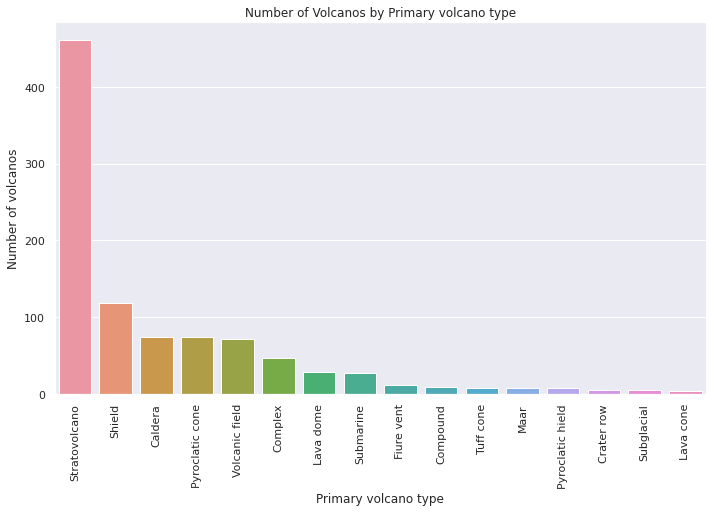

In [ ]:
# Visualize amount of volcanos by primary volcano type
count_types = df_volcano['primary_volcano_type'].value_counts().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data = count_types, x = 'index', y = 'primary_volcano_type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Number of Volcanos by Primary volcano type')
plt.xlabel('Primary volcano type')
plt.ylabel('Number of volcanos')

So the biggest number of volcanos are Stratovolcano primary type - 461 volcano. Second - Shield type volcanos.

Text(145.5, 0.5, 'Number of volcanos')

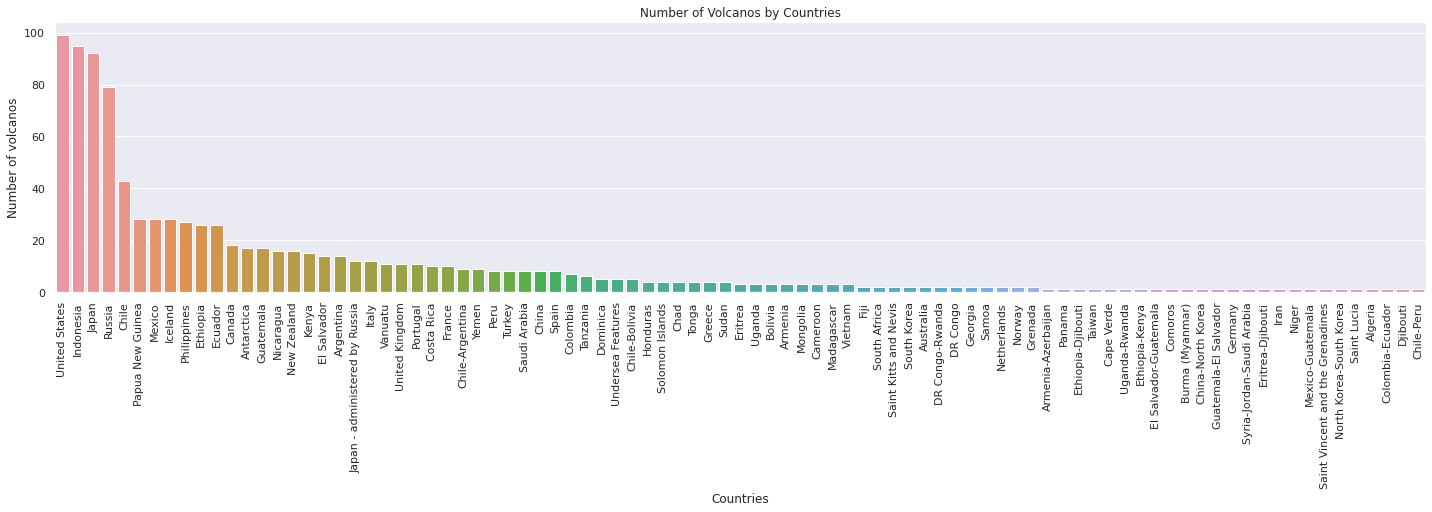

In [ ]:
# Visualize amount of volcanos by country
count_country = df_volcano['country'].value_counts().reset_index()

plt.figure(figsize=(20,7))
sns.barplot(data = count_country, x = 'index', y = 'country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Number of Volcanos by Countries')
plt.xlabel('Countries')
plt.ylabel('Number of volcanos')

So next interesting thing to check is volcanos number by countries. Most volcanoes are in the Usa, not least in Indonesia and Japan. Compared to the area of the countries, Japan is the densest in terms of volcanoes.

Text(0.5, 66.5, 'Longitude')

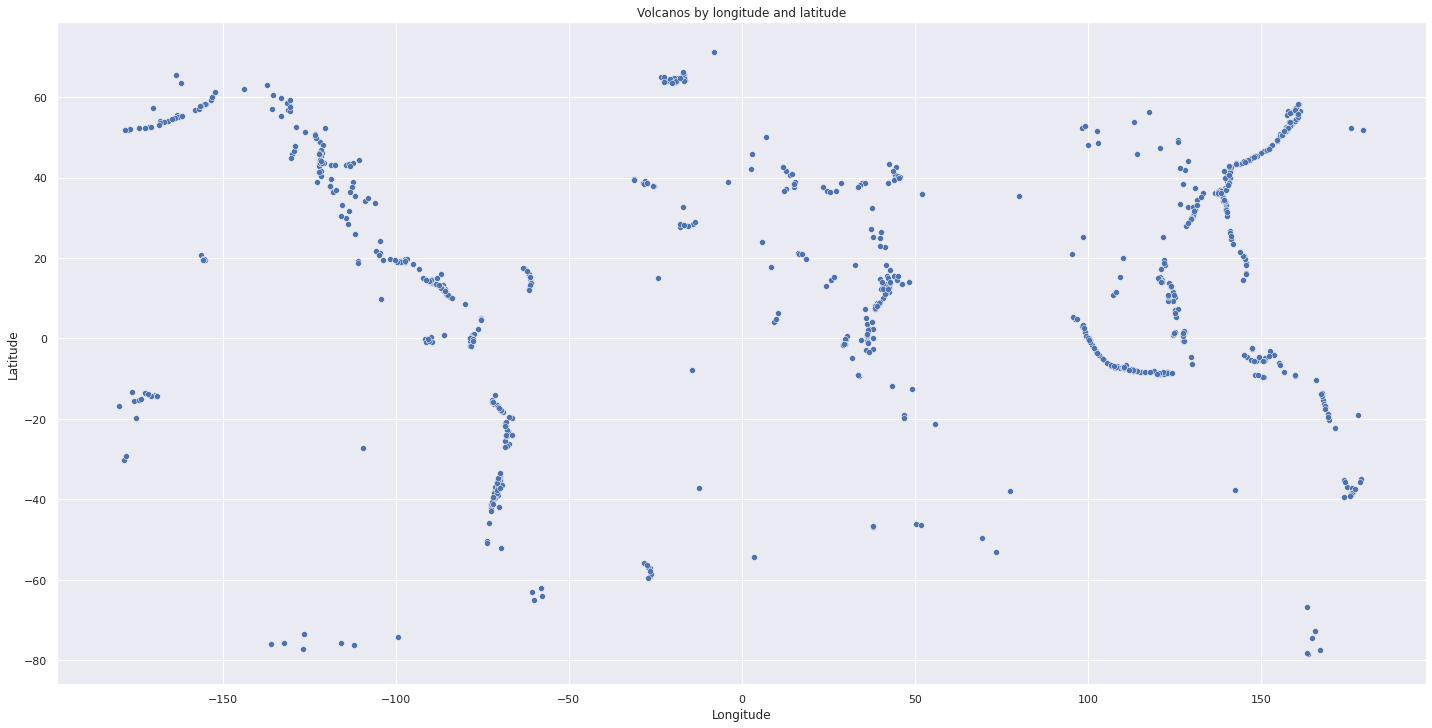

In [ ]:
# Visualize Volcanos by longitude and latitude.  
plt.figure(figsize=(20,10))
sns.scatterplot(data = df_volcano, y = "latitude", x = "longitude")
plt.tight_layout()
plt.title('Volcanos by longitude and latitude')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

Scatter plot shows that the volcanoes are arranged by tectonic plates.



Text(13.425000000000011, 0.5, 'Population within 100 km')

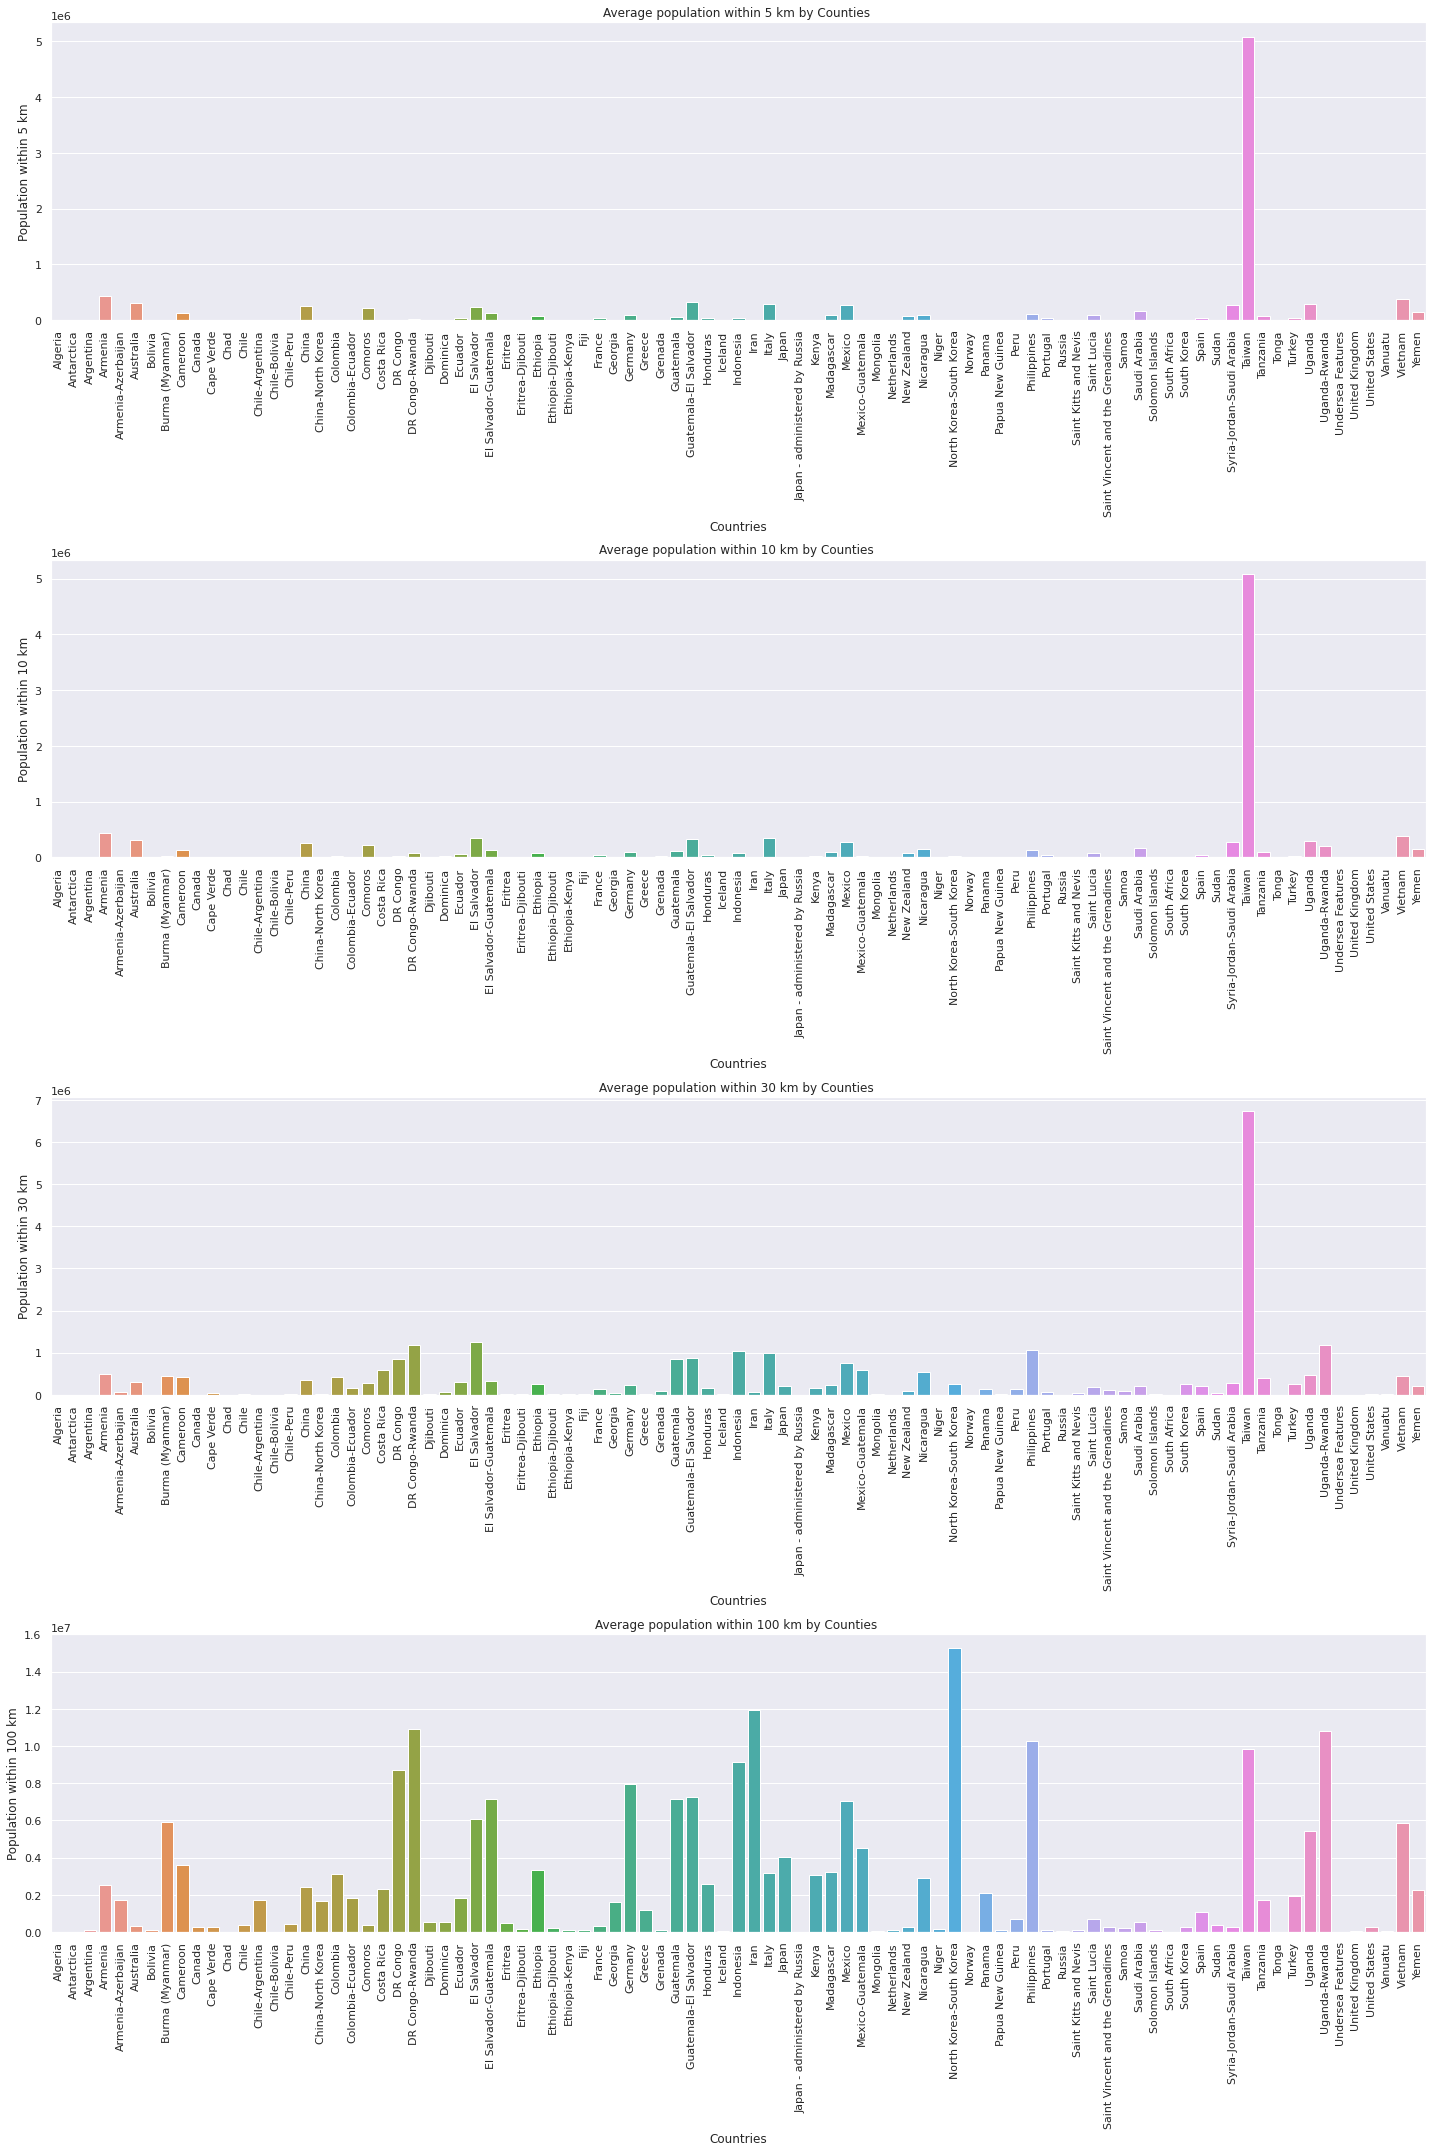

In [ ]:
# Ploting mean population around volcanos in different countries
plt.figure(figsize=(20,30))

ax = plt.subplot(4,1,1)
count_pop5_mean = round(df_volcano.groupby('country')['population_within_5_km'].mean(),2).reset_index()
sns.barplot(data = count_pop5_mean, x = 'country', y = 'population_within_5_km')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Average population within 5 km by Counties ')
plt.xlabel('Countries')
plt.ylabel('Population within 5 km')

ax = plt.subplot(4,1,2)
count_pop10_mean = round(df_volcano.groupby('country')['population_within_10_km'].mean(),2).reset_index()
sns.barplot(data = count_pop10_mean, x = 'country', y = 'population_within_10_km')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Average population within 10 km by Counties ')
plt.xlabel('Countries')
plt.ylabel('Population within 10 km')

ax = plt.subplot(4,1,3)
count_pop30_mean = round(df_volcano.groupby('country')['population_within_30_km'].mean(),2).reset_index()
sns.barplot(data = count_pop30_mean, x = 'country', y = 'population_within_30_km')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Average population within 30 km by Counties ')
plt.xlabel('Countries')
plt.ylabel('Population within 30 km')

ax = plt.subplot(4,1,4)
count_pop100_mean = round(df_volcano.groupby('country')['population_within_100_km'].mean(),2).reset_index()
sns.barplot(data = count_pop100_mean, x = 'country', y = 'population_within_100_km')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Average population within 100 km by Counties ')
plt.xlabel('Countries')
plt.ylabel('Population within 100 km')

Looking at mean population around volcanos in different countries. It can be seen that the average population around volcanoes at a distance of 5-30 km is strongly different in Indonesia. So in Indonesia people live much closer to Volcanoes than anywhere else. Though if we are talking about 100 km distance around Volcanoes, then North Korea - South Korea with an average population spikes the most. 

Text(34.175000000000004, 0.5, 'Population within 100 km')

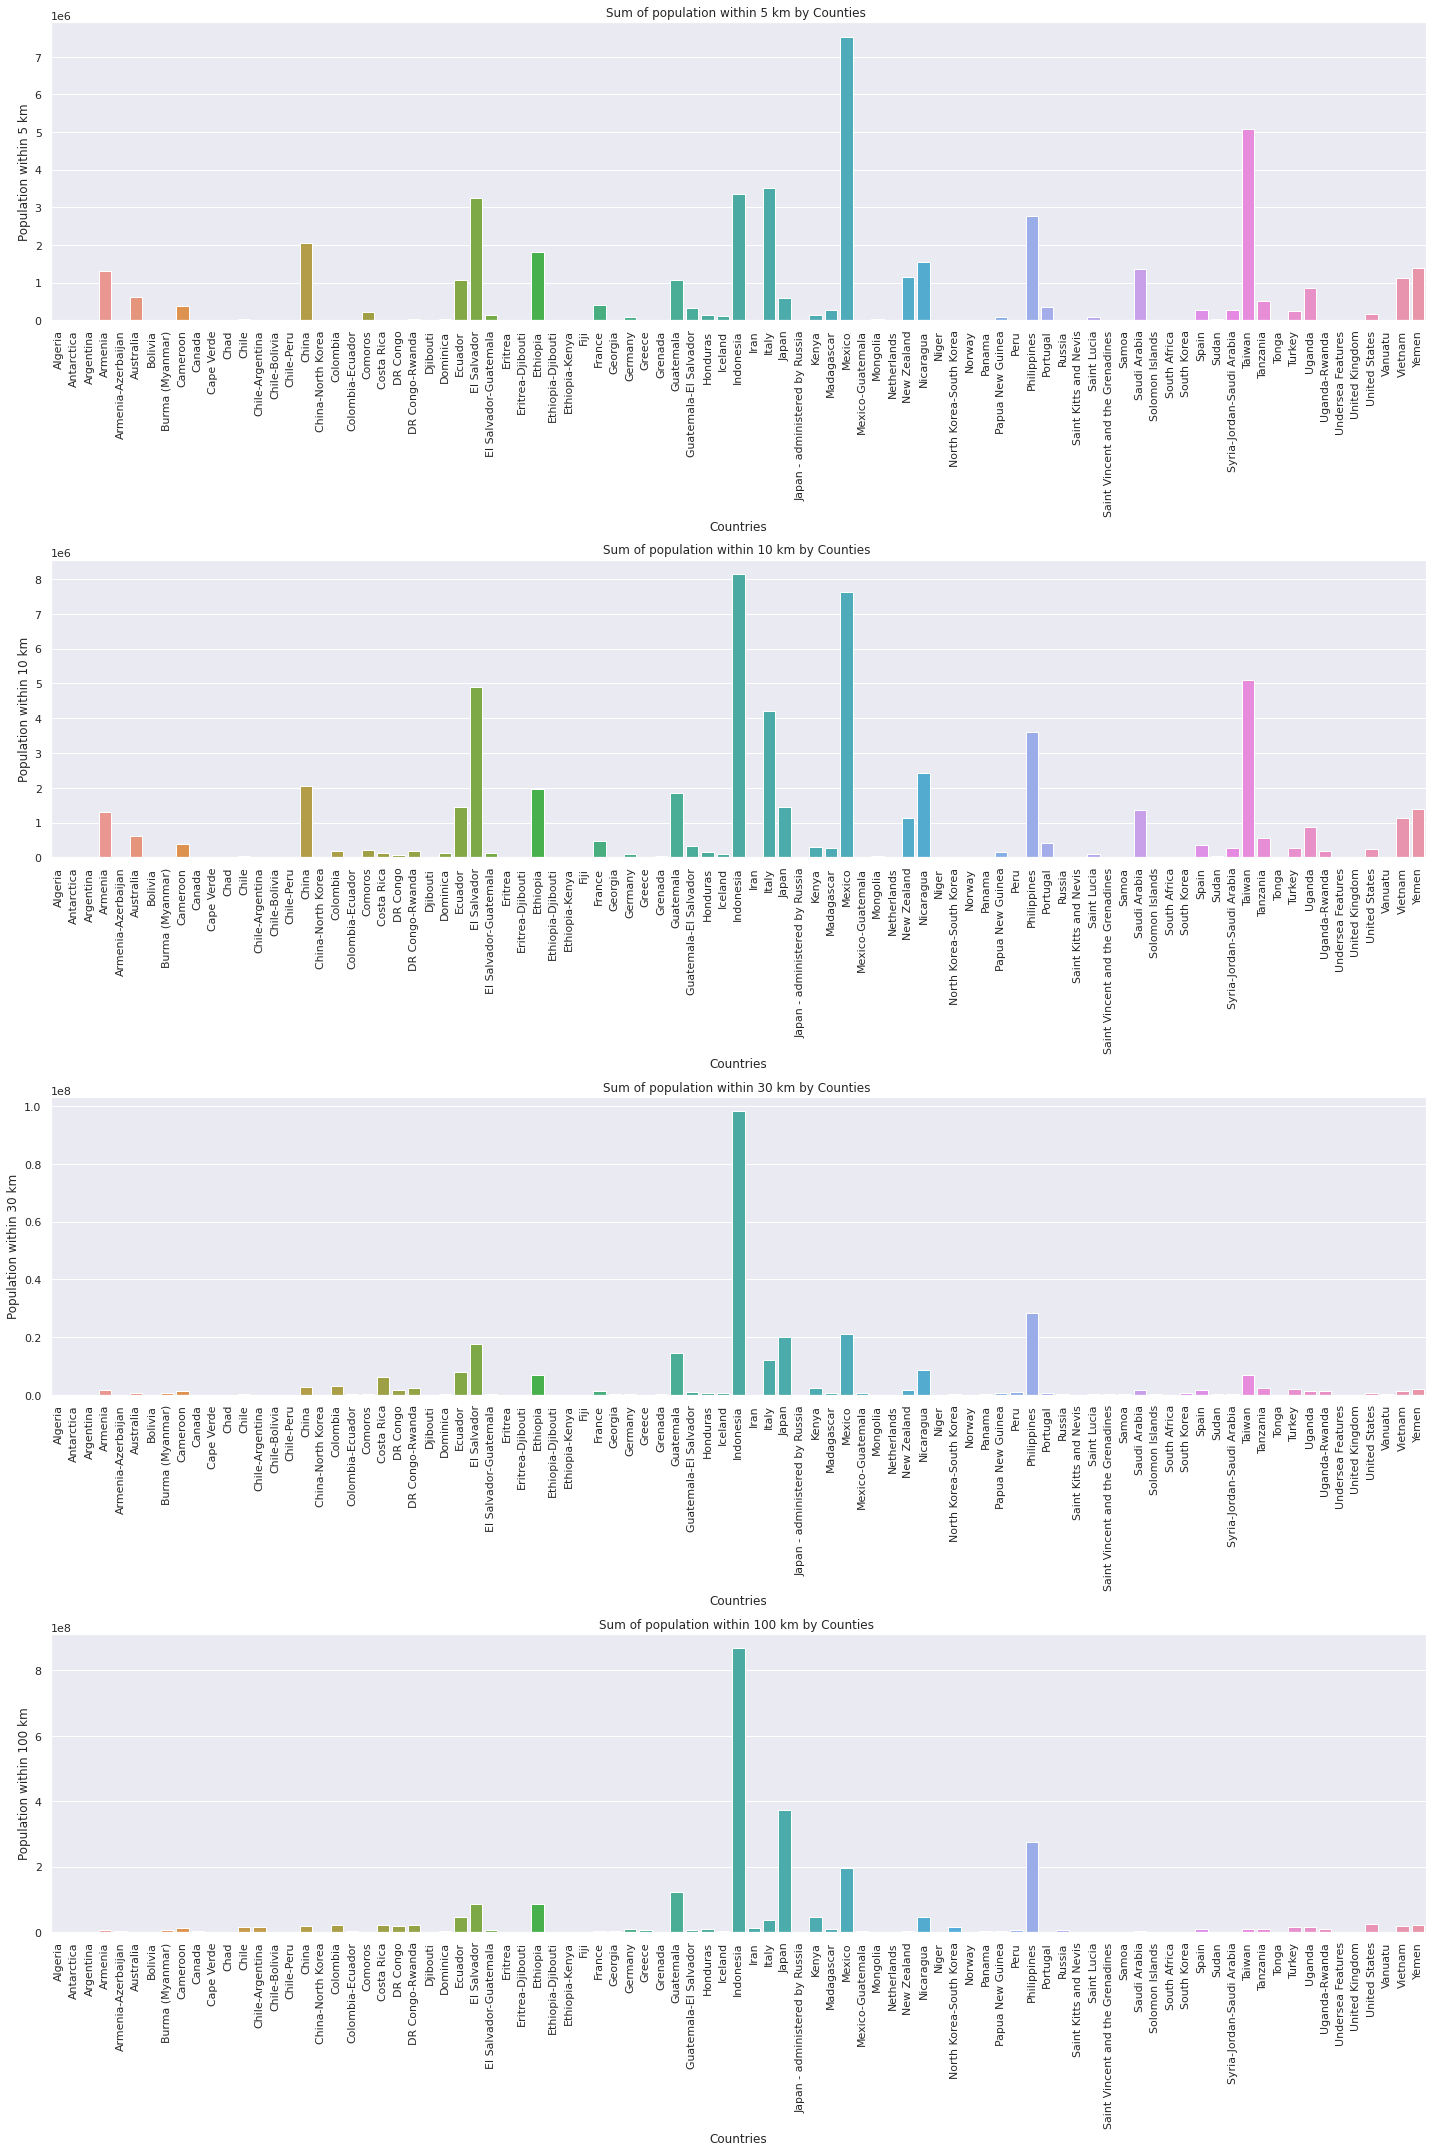

In [ ]:
# Ploting sum population around volcanos in different countries
plt.figure(figsize=(20,30))

ax = plt.subplot(4,1,1)
count_pop5_sum = round(df_volcano.groupby('country')['population_within_5_km'].sum(),2).reset_index()
sns.barplot(data = count_pop5_sum, x = 'country', y = 'population_within_5_km')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Sum of population within 5 km by Counties ')
plt.xlabel('Countries')
plt.ylabel('Population within 5 km')

ax = plt.subplot(4,1,2)
count_pop10_sum = round(df_volcano.groupby('country')['population_within_10_km'].sum(),2).reset_index()
sns.barplot(data = count_pop10_sum, x = 'country', y = 'population_within_10_km')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Sum of population within 10 km by Counties ')
plt.xlabel('Countries')
plt.ylabel('Population within 10 km')

ax = plt.subplot(4,1,3)
count_pop30_sum = round(df_volcano.groupby('country')['population_within_30_km'].sum(),2).reset_index()
sns.barplot(data = count_pop30_sum, x = 'country', y = 'population_within_30_km')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Sum of population within 30 km by Counties ')
plt.xlabel('Countries')
plt.ylabel('Population within 30 km')

ax = plt.subplot(4,1,4)
count_pop100_sum = round(df_volcano.groupby('country')['population_within_100_km'].sum(),2).reset_index()
sns.barplot(data = count_pop100_sum, x = 'country', y = 'population_within_100_km')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Sum of population within 100 km by Counties ')
plt.xlabel('Countries')
plt.ylabel('Population within 100 km')

While comparing sum of population in different distance, in 5 km spikes Mexico the most, and further we get, Indonesia spikes more. 

Text(0.5, 0, 'Primary volcano type')

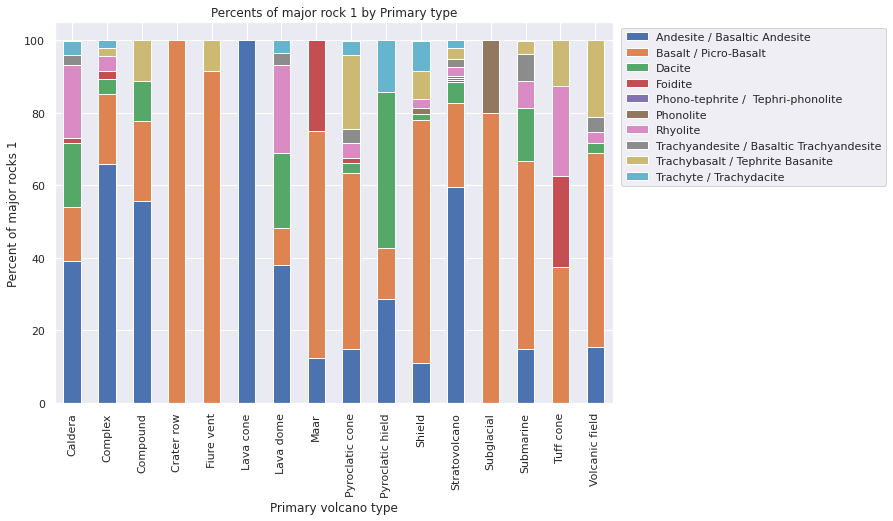

In [ ]:
# Visualization of major rock part ant each primary volcano type.
major_rock_1_types = df_volcano.groupby(['primary_volcano_type','major_rock_1'])['volcano_number'].count().reset_index()
major_rock_pivot_df = major_rock_1_types.pivot(index='major_rock_1', columns='primary_volcano_type', values='volcano_number')
major_rock_pivot_df = major_rock_pivot_df.replace(np.nan, 0)

for i in range(len(major_rock_pivot_df.columns)):
  major_rock_pivot_df[major_rock_pivot_df.columns[i]] = round((major_rock_pivot_df[major_rock_pivot_df.columns[i]]/major_rock_pivot_df[major_rock_pivot_df.columns[i]].sum())*100,2)

major_rock_pivot_df.T.plot.bar(stacked=True, figsize=(10,7))
pylab.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.title('Percents of major rock 1 by Primary type')
plt.ylabel('Percent of major rocks 1')
plt.xlabel('Primary volcano type')

Here, we see what the main rocks 1 dominate in each of the primary volcanic types. So it can be seen that Andesite / Basaltic Andesite and Basalt / Picro-Basalt are the most popular major rocks in most volcano types.

## Eruption dataset visualization

Text(14.5, 0.5, 'Number of eruptions')

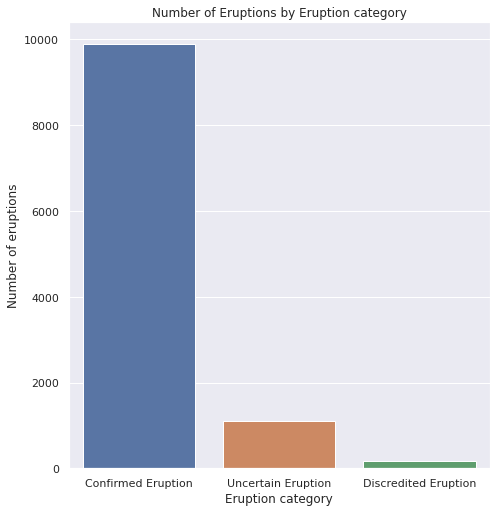

In [ ]:
# Counting Eruption categories
count_erup_catg = df_eruptions.eruption_category.value_counts().reset_index()

plt.figure(figsize=(7,7))
sns.barplot(data = count_erup_catg, x = 'index', y = 'eruption_category')
plt.tight_layout()
plt.title('Number of Eruptions by Eruption category')
plt.xlabel('Eruption category')
plt.ylabel('Number of eruptions')

So the most data in eruptions dataset is confirmed eruptions. 

Text(152.5, 0.5, 'Number of eruptions')

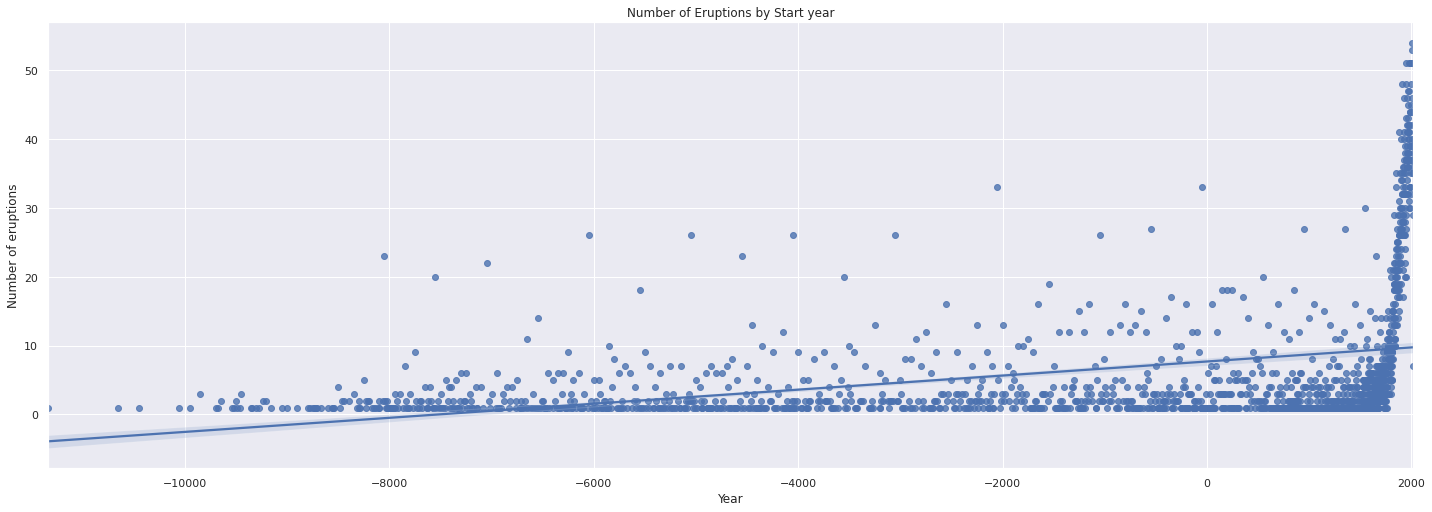

In [ ]:
# Visualizing eruption number by start year
count_erup_year = df_eruptions.start_year.value_counts().reset_index().sort_values('index')

plt.figure(figsize=(20,7))
sns.regplot(data = count_erup_year, x = 'index', y = 'start_year')
plt.tight_layout()
plt.title('Number of Eruptions by Start year')
plt.xlabel('Year')
plt.ylabel('Number of eruptions')

Monitoring eruption data suggests an increase in eruptions. Although it should be mentioned that the old eruptions were not recorded and determined by historical research, which would mean that the information gathered right now is better.

Now, I would like to see how strong are eruptions in 21st century, so I will plot voi lineplot. 

In [ ]:
# Taking care of eruption start date, combining from year, month and day.
# Filtering rows by year from 2000.

eruptions_from2000 = df_eruptions[df_eruptions['start_year']>=2000]
eruptions_from2000 = eruptions_from2000[eruptions_from2000['vei'].notna()]
eruptions_from2000 = eruptions_from2000[eruptions_from2000['start_month'].notna()]
eruptions_from2000 = eruptions_from2000[eruptions_from2000['start_day'].notna()]
eruptions_from2000 = eruptions_from2000[eruptions_from2000['start_month'] > 0]
eruptions_from2000 = eruptions_from2000[eruptions_from2000['start_day'] > 0]
eruptions_from2000['start_year'] = eruptions_from2000['start_year'].astype(int)
eruptions_from2000['start_month'] = eruptions_from2000['start_month'].astype(int)
eruptions_from2000['start_day'] = eruptions_from2000['start_day'].astype(int)

eruptions_from2000 = eruptions_from2000.reset_index()
eruptions_from2000 = eruptions_from2000.rename(columns={"start_year": "year", "start_month": "month", "start_day": "day"})
eruptions_from2000 = eruptions_from2000.assign(start_date = pd.to_datetime(eruptions_from2000[["year", "month", "day"]]))

Text(159.5, 0.5, 'VOI')

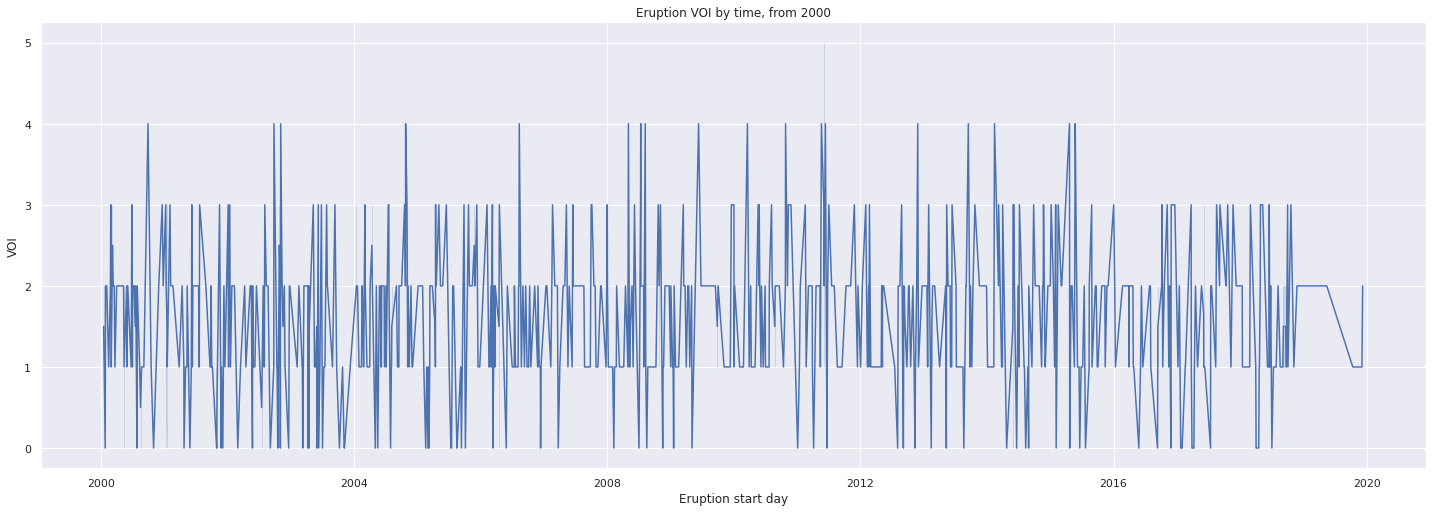

In [ ]:
# Ploting voi lineplot.
plt.figure(figsize=(20,7))
sns.lineplot(data=eruptions_from2000, x="start_date", y="vei")
plt.tight_layout()
plt.title('Eruption VOI by time, from 2000')
plt.xlabel('Eruption start day')
plt.ylabel('VOI')

So the strongest eruptions were with VOI equal to 4, though, from 2016 year there were no stronger eruption than VOI 3.

## Events dataset visualization

Text(138.5, 0.5, 'Number of events')

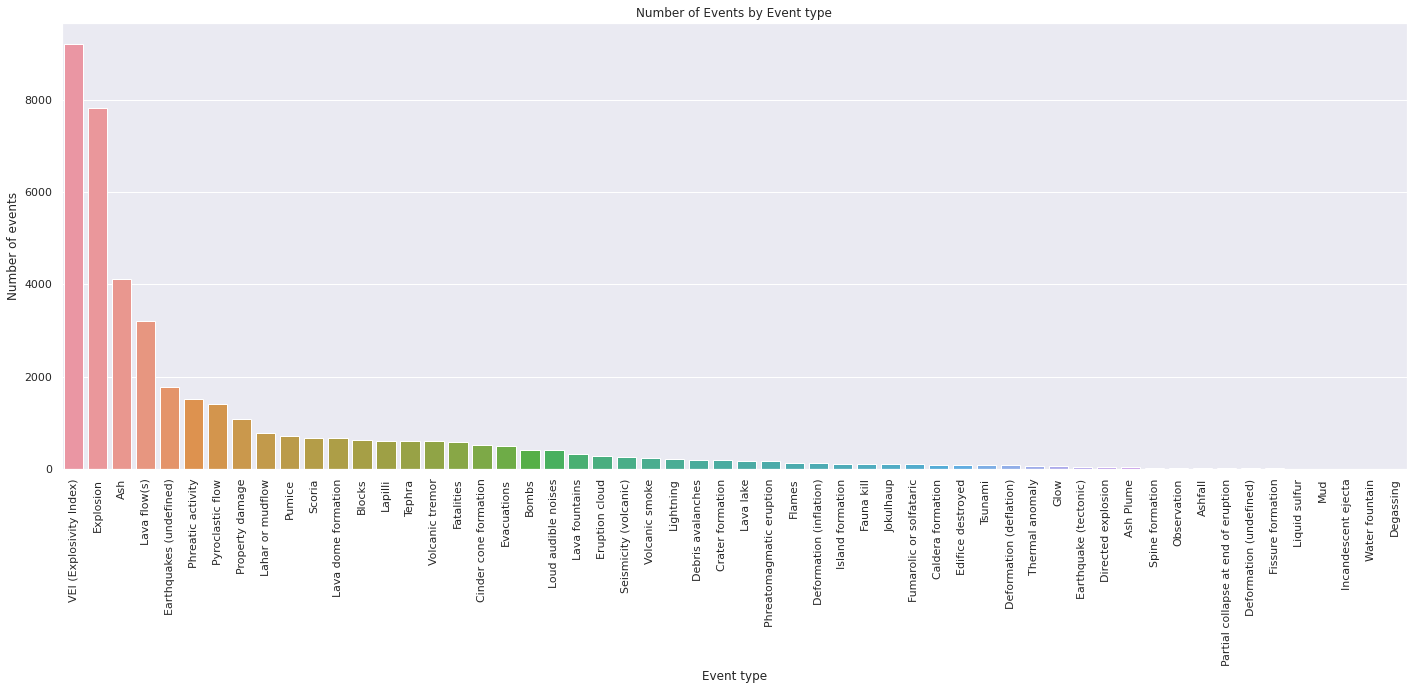

In [ ]:
# Counting number of events by events type
count_event_type = df_events.event_type.value_counts().reset_index()

plt.figure(figsize=(20,7))
sns.barplot(data = count_event_type, x = 'index', y = 'event_type')
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('Number of Events by Event type')
plt.xlabel('Event type')
plt.ylabel('Number of events')

So the most events records VEI (Explosivity Index), then Explosion and Ash. 

In [ ]:
print('The average number of events during eruption: ', round(df_events.groupby('eruption_number')['volcano_number'].count().mean(),3))

The average number of events during eruption:  3.84


Text(145.5, 0.5, 'Number of events')

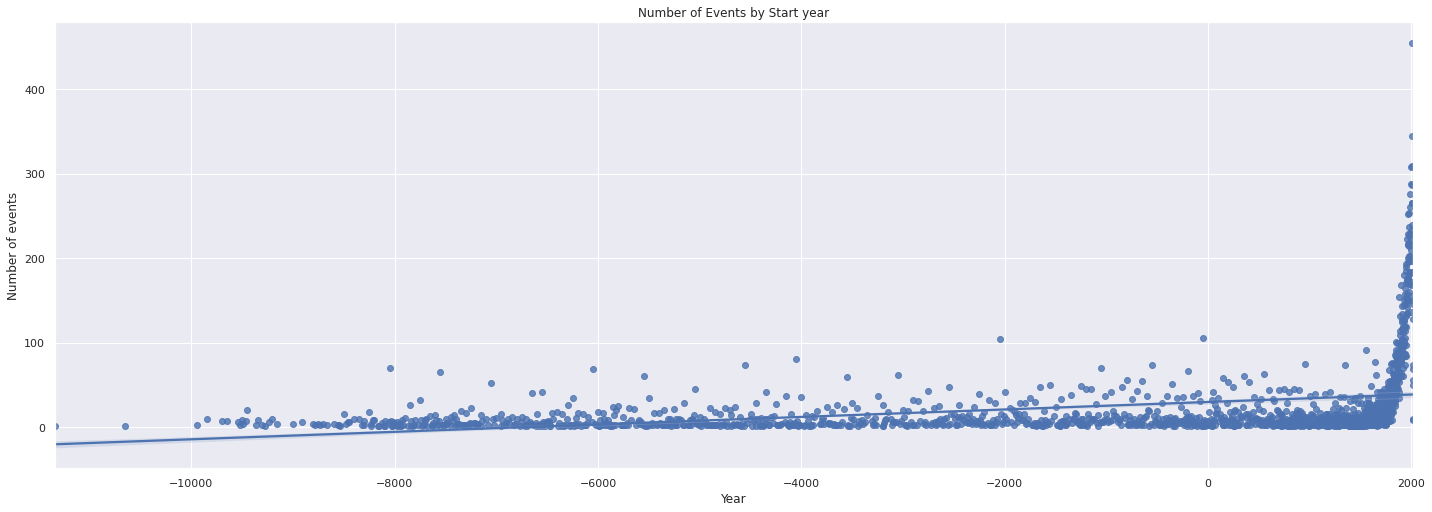

In [ ]:
# Visualizing events number by eruption start years
count_event_year = df_events.eruption_start_year.value_counts().reset_index().sort_values('index')

plt.figure(figsize=(20,7))
sns.regplot(data = count_event_year, x = 'index', y = 'eruption_start_year')
plt.tight_layout()
plt.title('Number of Events by Start year')
plt.xlabel('Year')
plt.ylabel('Number of events')

It could be the same assumption, that more and more events are recorded and information gathered gets better.

## Multiple datasets visualization

In [ ]:
#Counting Volcanos, which events are not recorded
volc_no_events = pd.merge(df_events, df_volcano, how = 'right', on = 'volcano_number')
print('In Volcano dataset are ', volc_no_events['volcano_name_x'].isna().sum(), ' volcanos, about which events there are no information')

In Volcano dataset are  283  volcanos, about which events there are no information


In [ ]:
# Preparing DataFrame with events number per eruption.
events_volcanos = pd.merge(df_events, df_volcano, how = 'left', on = 'volcano_number')

count_events_erup = events_volcanos.groupby('eruption_number')['volcano_number'].count().reset_index()
country_reg_type = events_volcanos[['eruption_number', 'primary_volcano_type', 'country', 'region']]
country_reg_type = country_reg_type.drop_duplicates()
events_country_type_region = pd.merge(count_events_erup, country_reg_type, how = 'left', on = 'eruption_number')
events_country_type_region = events_country_type_region.rename(columns={"volcano_number": "events_number"})
events_country_type_region

,eruption_number,events_number,primary_volcano_type,country,region
0,10001,2,Maar,Germany,Mediterranean and Western Asia
1,10002,2,Maar,Germany,Mediterranean and Western Asia
2,10003,3,Lava dome,France,Mediterranean and Western Asia
3,10004,3,Lava dome,France,Mediterranean and Western Asia
4,10005,2,Lava dome,France,Mediterranean and Western Asia
...,...,...,...,...,...
10756,22344,8,Caldera,Philippines,Philippines and SE Asia
10757,22349,1,Stratovolcano,Chile,South America
10758,22350,1,Stratovolcano,Chile,South America
10759,22351,1,Stratovolcano,Chile,South America


Text(159.5, 0.5, 'Number of events')

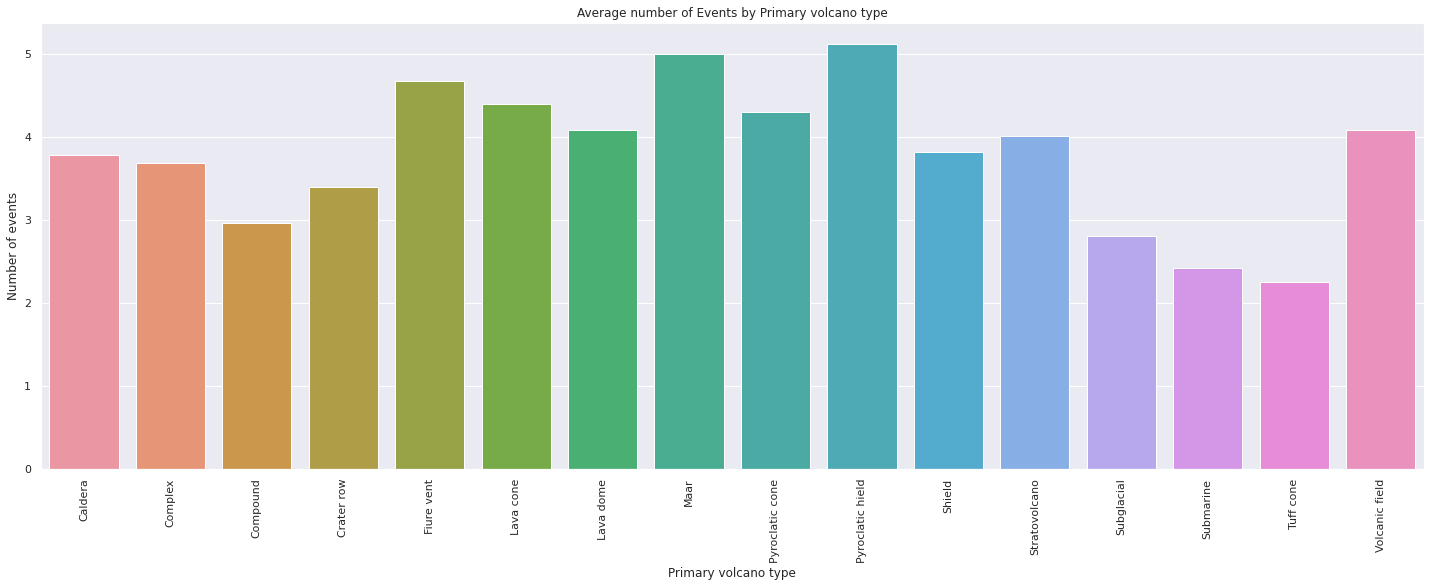

In [ ]:
# Visualize average number of events by primary volcano type
count_event_pr_type = events_country_type_region.groupby('primary_volcano_type')['events_number'].mean().reset_index()

plt.figure(figsize=(20,7))
sns.barplot(data = count_event_pr_type, x = 'primary_volcano_type', y = 'events_number')
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('Average number of Events by Primary volcano type')
plt.xlabel('Primary volcano type')
plt.ylabel('Number of events')

So the biggest average number of events has Pytoclatic hield type volcanoes - more than 5. Around 5 has Maar volcanoes. The smallest amount of events has Tuff cone volcanoes.

Text(0.5, 0, 'Number of events')

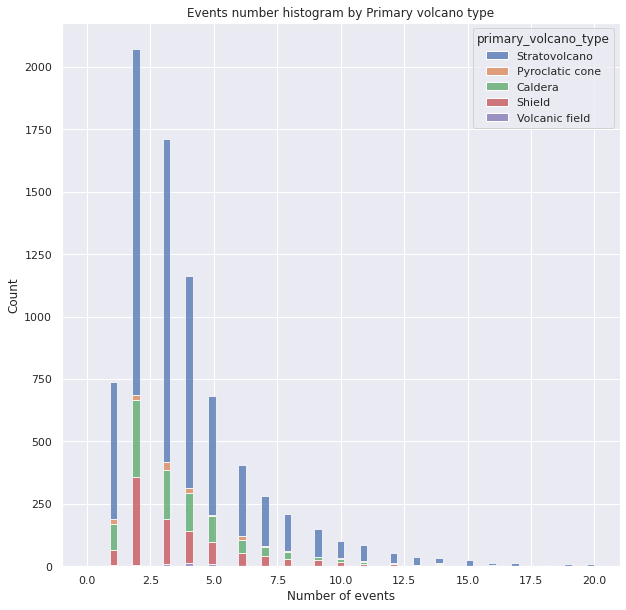

In [ ]:
# Top 5 primary volcano types events number histogram
events_top5_pr_types = events_country_type_region[events_country_type_region['primary_volcano_type'].isin(['Stratovolcano', 'Shield', 'Pyroclatic cone', 'Caldera', 'Volcanic field'])]

plt.figure(figsize=(10,10))
sns.histplot(events_top5_pr_types, x = "events_number", hue = 'primary_volcano_type', multiple="stack", binrange = (0,20))
plt.title('Events number histogram by Primary volcano type')
plt.xlabel('Number of events')

The histogram shows that for all top 5 types of volcanoes, two events usually occur during an eruption.

Text(138.5, 0.5, 'Number of events')

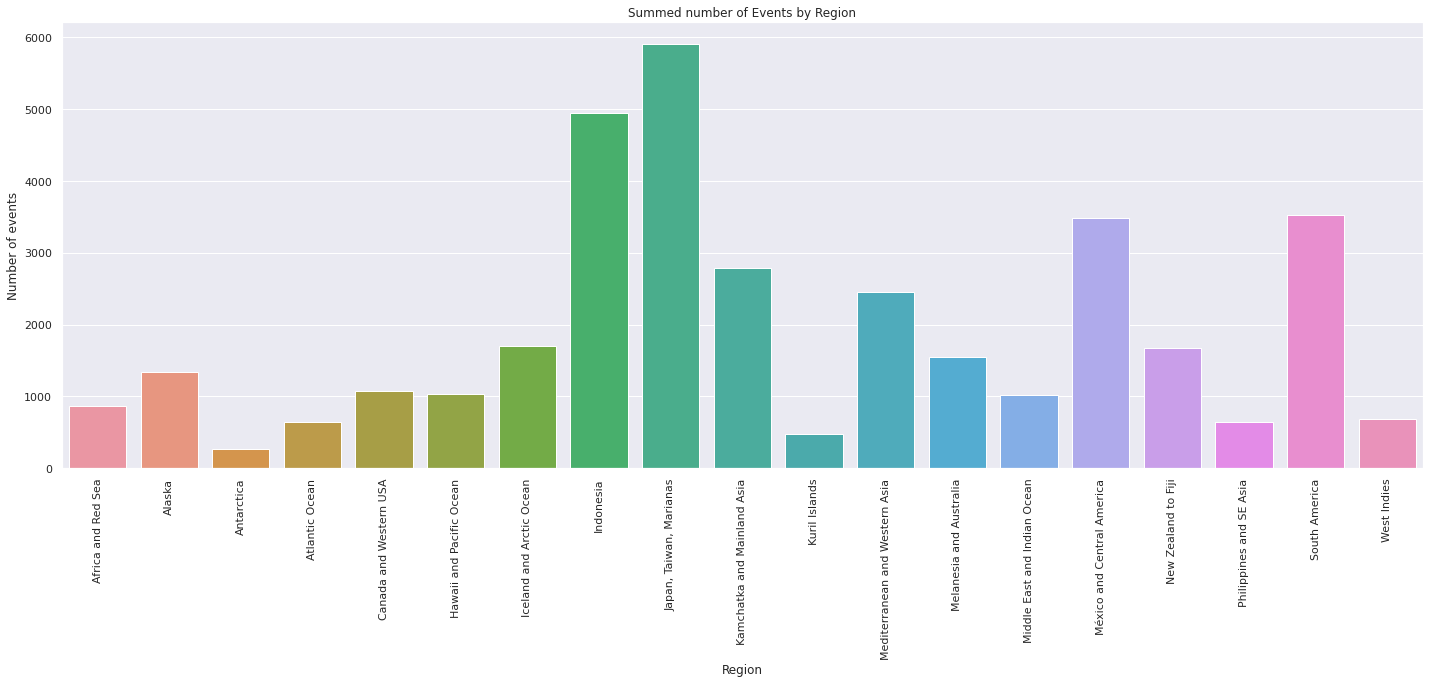

In [ ]:
# Visualize summed number of events by regions
count_event_reg = events_country_type_region.groupby('region')['events_number'].sum().reset_index()

plt.figure(figsize=(20,7))
sns.barplot(data = count_event_reg, x = 'region', y = 'events_number')
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('Summed number of Events by Region')
plt.xlabel('Region')
plt.ylabel('Number of events')

So counting a number of events in Regions, shows that the biggest number of event happend in Japan, Taiwan, Marianas region, though there are not the most volcanoes. 

(0.0, 20.0)

<Figure size 720x720 with 0 Axes>

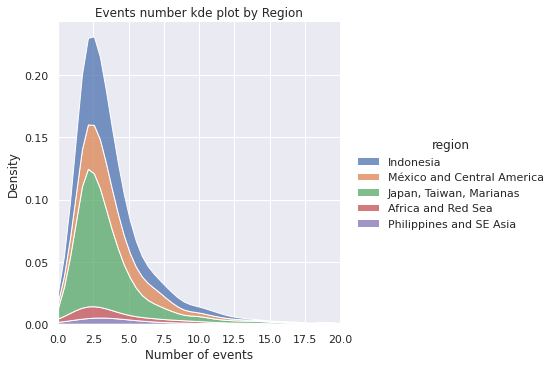

In [ ]:
# Top 5 regions, by population withing 100 km. 
count_reg_pop100_sum = round(df_volcano.groupby('region')['population_within_100_km'].sum(),2).reset_index()
count_reg_pop100_sum = count_reg_pop100_sum.sort_values(by='population_within_100_km', ascending = False)
top5_regions_bypop = list(count_reg_pop100_sum['region'].iloc[0:5])
# Visualizing events density by top 5 regions, by population withing 100 km. 
events_top5_regions_bypop = events_country_type_region[events_country_type_region['region'].isin(top5_regions_bypop)]

plt.figure(figsize=(10,10))
sns.displot(events_top5_regions_bypop, x="events_number", hue = 'region', multiple="stack", kind = 'kde')
plt.title('Events number kde plot by Region')
plt.xlabel('Number of events')
plt.xlim([0, 20]) 

Thus, in all top 5 regions, there mainly happens two events during the eruption.

## Findings

- Here we have data about 
  - 958 Volcanoes
  - 11178 Eruptions
  - 41322 Events

- So the biggest number of volcanos are Stratovolcano primary type - 461 volcanoes. Second - Shield type volcanoes.

- Most volcanoes are in the Usa, not least in Indonesia and Japan. Compared to the area of the countries, Japan is the densest in terms of volcanoes.

- Volcanoes are arranged by tectonic plates.

- In Indonesia people live much closer to Volcanoes than anywhere else. Though if we are talking about 100 km distance around Volcanoes, then North Korea - South Korea with an average population spikes the most. 

- While comparing sum of population in differnet distance, in 5 km spikes Mexico the most, and further we get, Indonesia spikes more. 

- So it can be seen that Andesite / Basaltic Andesite and Basalt / Picro-Basalt are the most popular major rocks in most volcanoes types.

- So the strongest eruptions in 21st century were with VOI equal to 4, though, from 2016 year there were no stronger eruption than VOI 3.

- The most events records VEI (Explosivity Index), then Explosion and Ash. 

- The average number of events during eruption: 3.84

- In Volcano dataset are  283  volcanos, about which events there are no information

- The biggest average number of events has Pytoclatic hield type volcanoes - more than 5. Around 5 has Maar volcanoes. The smallest amount of events has Tuff cone volcanoes.

- The biggest number of event happend in Japan, Taiwan, Marianas region, though there are not the most volcanoes.
